In unimanual, the speed of which reach is performed could be different across hands and directions. The bimanual reaches I anticipate to be overall slower. Furthermore, I hypothesize that mathced and mirror are similar to each other but different from unmatched.

In [2]:
import os
import sys
from pathlib import Path
import glob
import getpass
import importlib

import numpy as np
import pandas as pd
import scipy.io as sio
from statsmodels.stats.anova import AnovaRM
import pingouin as pg

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.cm import ScalarMappable
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import utils
importlib.reload(utils)

# SET PATHS:
baseDir = os.path.join('/Users', getpass.getuser(), 'Desktop', 'Projects', 'bimanual_wrist')
fMRI_behavDir = os.path.join(baseDir,'data','fMRI','behavioural')
train_behavDir = os.path.join(baseDir,'data','training')
anaDir = os.path.join(baseDir,'analysis')
figDir = os.path.join(baseDir,'figures')

path = {'baseDir': baseDir,
        'fMRI_behavDir': fMRI_behavDir,
        'train_behavDir': train_behavDir,
        'anaDir': anaDir}



## Unimanual MT

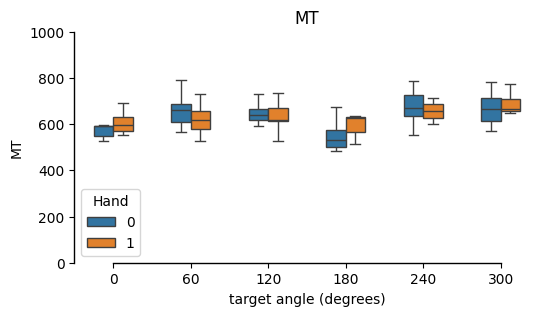

                      F Value  Num DF  Den DF    Pr > F
targetAngle_L       16.054852     5.0    30.0  1.05e-07
Hand                 0.001616     1.0     6.0  9.69e-01
targetAngle_L:Hand   3.608808     5.0    30.0  1.13e-02


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,targetAngle_L,0,60,True,True,-2.576755,6.0,two-sided,0.041952,0.629281,bonf,2.26,-0.632672
1,targetAngle_L,0,120,True,True,-2.511212,6.0,two-sided,0.045828,0.687421,bonf,2.117,-0.726638
2,targetAngle_L,0,180,True,True,1.519866,6.0,two-sided,0.179355,1.000000,bonf,0.802,0.378026
3,targetAngle_L,0,240,True,True,-2.628125,6.0,two-sided,0.039158,0.587367,bonf,2.379,-0.935364
4,targetAngle_L,0,300,True,True,-4.020640,6.0,two-sided,0.006954,0.104307,bonf,8.897,-1.118988
5,targetAngle_L,60,120,True,True,-0.090144,6.0,two-sided,0.931107,1.000000,bonf,0.354,-0.010655
6,targetAngle_L,60,180,True,True,6.241260,6.0,two-sided,0.000784,0.011753,bonf,49.759,1.048096
7,targetAngle_L,60,240,True,True,-1.701107,6.0,two-sided,0.139826,1.000000,bonf,0.949,-0.280036
8,targetAngle_L,60,300,True,True,-5.077872,6.0,two-sided,0.002270,0.034054,bonf,21.38,-0.449597
9,targetAngle_L,120,180,True,True,8.241406,6.0,two-sided,0.000172,0.002587,bonf,168.096,1.233454


In [25]:
ana = pd.read_csv(os.path.join(anaDir, 'bmw.csv'))
df_uni = ana[ana.Uni_or_Bi == 0]

fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=df_uni, x="targetAngle_L", y="MT", hue="Hand", width=0.5, fliersize=0)
plt.xlabel('target angle (degrees)')
plt.title(f'MT')
plt.ylim((0,1000))
utils.please.make_it_pretty(ax=ax)
# plt.savefig(os.path.join(figDir, 'behaviour', f'unimanual_MT.pdf'), bbox_inches="tight")
plt.show()

# ANOVA RM:
table = AnovaRM(data=df_uni, depvar='MT', subject='sn', within=['targetAngle_L', 'Hand'])
results = table.fit()
anova_df = results.anova_table.copy()
anova_df['Pr > F'] = anova_df['Pr > F'].apply(lambda p: f"{p:.2e}")
print(anova_df)

# pairwise t-tests:
pg.pairwise_tests(data=df_uni, dv='MT', within=['targetAngle_L'], subject='sn', padjust='bonf', interaction=True, alpha=0.05)


## Bimanual, reach type

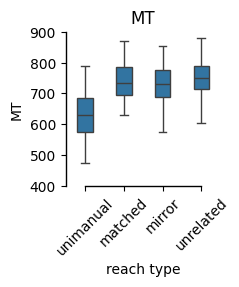

               F Value  Num DF  Den DF    Pr > F
reach_type  120.099058     3.0    18.0  4.31e-12


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,reach_type,matched,mirror,True,True,2.657752,6.0,two-sided,0.037637,0.225821,bonf,2.45,0.153305
1,reach_type,matched,unimanual,True,True,11.227998,6.0,two-sided,0.000030,0.000179,bonf,701.775,1.637616
2,reach_type,matched,unrelated,True,True,-3.567191,6.0,two-sided,0.011824,0.070945,bonf,5.902,-0.233004
3,reach_type,mirror,unimanual,True,True,10.800773,6.0,two-sided,0.000037,0.000224,bonf,584.689,1.508380
4,reach_type,mirror,unrelated,True,True,-8.035405,6.0,two-sided,0.000199,0.001191,bonf,149.998,-0.391533
5,reach_type,unimanual,unrelated,True,True,-12.751553,6.0,two-sided,0.000014,0.000086,bonf,1283.712,-1.890907


In [47]:
ana = pd.read_csv(os.path.join(anaDir, 'bmw.csv'))
ana.loc[ana.reach_type=='mirror-diagonal', 'reach_type'] = 'unrelated'
directions = [0, 60, 120, 180, 240, 300]

# bimanual = ana[ana.Uni_or_Bi == 1]
df = ana.groupby(['sn', 'reach_type']).agg(
    MT=('MT', 'mean'),
).reset_index()

fig, ax = plt.subplots(figsize=(2, 2))
sns.boxplot(data=ana, x='reach_type', y='MT', width=0.4, fliersize=0, order=['unimanual', 'matched', 'mirror', 'unrelated'])
plt.xticks(rotation=45)
plt.xlabel('reach type')
plt.title(f'MT')
plt.ylim((400,900))
utils.please.make_it_pretty(ax=ax)
# plt.savefig(os.path.join(figDir, 'behaviour', f'unimanual_MT.pdf'), bbox_inches="tight")
plt.show()

# ANOVA RM:
table = AnovaRM(data=df, depvar='MT', subject='sn', within=['reach_type'])
results = table.fit()
anova_df = results.anova_table.copy()
anova_df['Pr > F'] = anova_df['Pr > F'].apply(lambda p: f"{p:.2e}")
print(anova_df)

# pairwise t-tests:
pg.pairwise_tests(data=df, dv='MT', within=['reach_type'], subject='sn', padjust='bonf', interaction=True, alpha=0.05)